In [2]:
pwd

'C:\\Users\\Binura'

In [12]:
cd C:\

C:\


In [6]:
cd Cat&Dog Dataset

C:\Users\Binura\MLOM\Cat&Dog Dataset


In [7]:
#accquire data
train_path = 'Training_data'
valid_path = 'Testing_data'

In [8]:
#defining the model
import tensorflow as tf
from scipy import special
import numpy as np

model = tf.keras.models.Sequential([
    #Note the input shape is the desired size of the image 300*300 with 3 bytes color
    #This is the first convolution
    tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    #The second convolution
    tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    
    #The third convolution
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    
    #The fourth convolution
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    
    #Flattern the results to feed into a CNN
    tf.keras.layers.Flatten(),
    
    #512 neuron hidden layer
    tf.keras.layers.Dense(512,activation='relu'),
    
    #Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Cat') and 1 for the other('Dog')
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [26]:
#getting the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 73, 73, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 35, 35, 32)      

In [9]:
#compiling the model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),#learning rate as step size
             metrics=['accuracy'])

C:\Users\Binura\anaconda3\envs\tfradeon\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [10]:
#train the model from the generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All train images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)

#Flow training images in batches of 128  using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_path, #This is the source directory for the training images
                                                   target_size=(300,300),#All images will be resized to 150*150
                                                    batch_size=32,
                                                    #Since we use binary_crossentropy loss, we need binary labels 
                                                    class_mode='binary')

#All test images will be rescaled 1./255
test_datagen = ImageDataGenerator(rescale = 1./255)

#apply predefined specification to test the dataset
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size=(300,300),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [14]:
#training
#change the learning rate and the number of epochs
history = model.fit(train_generator,validation_data=test_set,steps_per_epoch=8,epochs=1000)

Epoch 1/1000
8/8 [==============================] - 3s 342ms/step - loss: 0.7197 - accuracy: 0.5863 - val_loss: 0.6560 - val_accuracy: 0.5350
Epoch 2/1000
8/8 [==============================] - 3s 373ms/step - loss: 0.6148 - accuracy: 0.6992 - val_loss: 1.0722 - val_accuracy: 0.5000
Epoch 3/1000
8/8 [==============================] - 3s 361ms/step - loss: 0.5739 - accuracy: 0.7108 - val_loss: 0.9323 - val_accuracy: 0.5000
Epoch 4/1000
8/8 [==============================] - 3s 368ms/step - loss: 0.6447 - accuracy: 0.6562 - val_loss: 0.6217 - val_accuracy: 0.6750
Epoch 5/1000
8/8 [==============================] - 3s 338ms/step - loss: 0.5577 - accuracy: 0.7269 - val_loss: 0.5959 - val_accuracy: 0.7000
Epoch 6/1000
8/8 [==============================] - 3s 325ms/step - loss: 0.5400 - accuracy: 0.7309 - val_loss: 0.7515 - val_accuracy: 0.5750
Epoch 7/1000
8/8 [==============================] - 3s 329ms/step - loss: 0.5799 - accuracy: 0.7031 - val_loss: 0.5991 - val_accuracy: 0.7000
Epoch 

8/8 [==============================] - 3s 326ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.7400 - val_accuracy: 0.6550
Epoch 59/1000
8/8 [==============================] - 3s 323ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.8513 - val_accuracy: 0.6700
Epoch 60/1000
8/8 [==============================] - 3s 324ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.9619 - val_accuracy: 0.6900
Epoch 61/1000
8/8 [==============================] - 3s 328ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.1254 - val_accuracy: 0.6300
Epoch 62/1000
8/8 [==============================] - 3s 328ms/step - loss: 0.6778 - accuracy: 0.9258 - val_loss: 1.3414 - val_accuracy: 0.7050
Epoch 63/1000
8/8 [==============================] - 3s 329ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.4449 - val_accuracy: 0.6950
Epoch 64/1000
8/8 [==============================] - 3s 322ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.5029 - val_accuracy: 0.6950
Epoch 65/1000

8/8 [==============================] - 3s 365ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.0087 - val_accuracy: 0.6700
Epoch 115/1000
8/8 [==============================] - 3s 357ms/step - loss: 5.7983e-04 - accuracy: 1.0000 - val_loss: 2.0780 - val_accuracy: 0.6850
Epoch 116/1000
8/8 [==============================] - 3s 347ms/step - loss: 3.6049e-04 - accuracy: 1.0000 - val_loss: 2.1262 - val_accuracy: 0.6800
Epoch 117/1000
8/8 [==============================] - 3s 345ms/step - loss: 2.6338e-04 - accuracy: 1.0000 - val_loss: 2.2541 - val_accuracy: 0.6900
Epoch 118/1000
8/8 [==============================] - 3s 332ms/step - loss: 1.3305e-04 - accuracy: 1.0000 - val_loss: 2.3388 - val_accuracy: 0.6950
Epoch 119/1000
8/8 [==============================] - 3s 323ms/step - loss: 9.1580e-05 - accuracy: 1.0000 - val_loss: 2.3331 - val_accuracy: 0.6850
Epoch 120/1000
8/8 [==============================] - 3s 332ms/step - loss: 6.9274e-05 - accuracy: 1.0000 - val_loss: 2.4654 - val_

Epoch 170/1000
8/8 [==============================] - 3s 369ms/step - loss: 4.1512e-06 - accuracy: 1.0000 - val_loss: 3.1471 - val_accuracy: 0.6900
Epoch 171/1000
8/8 [==============================] - 3s 347ms/step - loss: 2.7879e-06 - accuracy: 1.0000 - val_loss: 3.1760 - val_accuracy: 0.6900
Epoch 172/1000
8/8 [==============================] - 3s 367ms/step - loss: 1.6852e-06 - accuracy: 1.0000 - val_loss: 3.2438 - val_accuracy: 0.6950
Epoch 173/1000
8/8 [==============================] - 3s 361ms/step - loss: 1.3555e-06 - accuracy: 1.0000 - val_loss: 3.3030 - val_accuracy: 0.6900
Epoch 174/1000
8/8 [==============================] - 3s 344ms/step - loss: 9.7186e-07 - accuracy: 1.0000 - val_loss: 3.3461 - val_accuracy: 0.6900
Epoch 175/1000
8/8 [==============================] - 3s 366ms/step - loss: 6.1048e-07 - accuracy: 1.0000 - val_loss: 3.3899 - val_accuracy: 0.6850
Epoch 176/1000
8/8 [==============================] - 3s 364ms/step - loss: 4.4859e-07 - accuracy: 1.0000 - val_

8/8 [==============================] - 3s 366ms/step - loss: 2.5853e-06 - accuracy: 1.0000 - val_loss: 3.9892 - val_accuracy: 0.6700
Epoch 226/1000
8/8 [==============================] - 3s 367ms/step - loss: 9.2293e-07 - accuracy: 1.0000 - val_loss: 4.0633 - val_accuracy: 0.6700
Epoch 227/1000
8/8 [==============================] - 3s 364ms/step - loss: 7.0501e-07 - accuracy: 1.0000 - val_loss: 4.0915 - val_accuracy: 0.6750
Epoch 228/1000
8/8 [==============================] - 3s 371ms/step - loss: 5.6065e-07 - accuracy: 1.0000 - val_loss: 4.1834 - val_accuracy: 0.6750
Epoch 229/1000
8/8 [==============================] - 3s 331ms/step - loss: 2.6714e-07 - accuracy: 1.0000 - val_loss: 4.2790 - val_accuracy: 0.6800
Epoch 230/1000
8/8 [==============================] - 3s 369ms/step - loss: 2.3562e-07 - accuracy: 1.0000 - val_loss: 4.2875 - val_accuracy: 0.6800
Epoch 231/1000
8/8 [==============================] - 3s 329ms/step - loss: 2.0256e-07 - accuracy: 1.0000 - val_loss: 4.3773 - 

8/8 [==============================] - 3s 327ms/step - loss: 7.4432e-05 - accuracy: 1.0000 - val_loss: 3.7327 - val_accuracy: 0.6800
Epoch 281/1000
8/8 [==============================] - 3s 332ms/step - loss: 3.8852e-05 - accuracy: 1.0000 - val_loss: 3.7327 - val_accuracy: 0.6700
Epoch 282/1000
8/8 [==============================] - 3s 330ms/step - loss: 2.0086e-05 - accuracy: 1.0000 - val_loss: 3.7659 - val_accuracy: 0.6800
Epoch 283/1000
8/8 [==============================] - 3s 327ms/step - loss: 1.3919e-05 - accuracy: 1.0000 - val_loss: 3.8544 - val_accuracy: 0.6900
Epoch 284/1000
8/8 [==============================] - 3s 328ms/step - loss: 9.9781e-06 - accuracy: 1.0000 - val_loss: 3.8708 - val_accuracy: 0.6950
Epoch 285/1000
8/8 [==============================] - 3s 320ms/step - loss: 7.0108e-06 - accuracy: 1.0000 - val_loss: 3.9763 - val_accuracy: 0.6900
Epoch 286/1000
8/8 [==============================] - 3s 328ms/step - loss: 2.8954e-06 - accuracy: 1.0000 - val_loss: 3.9771 - 

KeyboardInterrupt: 

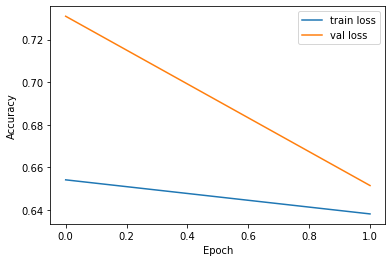

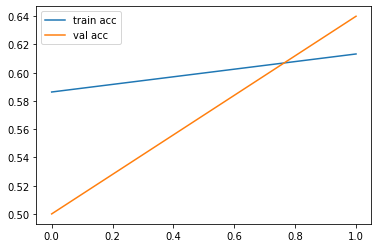

<Figure size 432x288 with 0 Axes>

In [16]:
#save weights for future predictions
model.save_weights('first_try.hs')

#plot variation in loss and accuracy
import matplotlib.pyplot as plt

#plot the loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')